In [397]:
import pandas as pd
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.set_theme(style="white")


In [398]:
df = pd.read_excel('./Grupo 01.xlsx')

## Center's Measurement

In [399]:
variables = ['precio','mt2','estrato','alcobas','banos','administracion','avaluo']

var_media = [round(df[i].mean(),2) for i in variables]
var_mediana = [round(df[i].median(),2) for i in variables]
var_mode = [round(df[i].mode(),2) for i in variables]

df_variables = pd.DataFrame(var_media)
df_variables.columns = ['Media']
df_variables['Mediana'] = var_mediana
df_variables['Moda'] = var_mode

## Scattering's Measurement

In [400]:
var_std = [round(df[i].std(),2) for i in variables]
# var_std
var_min = [df[i].min() for i in variables]
# var_min
var_max = [df[i].max() for i in variables]
# var_max
var_q1 = [round(df[i].quantile(q=0.25),2) for i in variables]
# var_q1
var_q3 = [round(df[i].quantile(q=0.75),2) for i in variables]
# var_q3
var_var = [round(df[i].var(),2) for i in variables]
# var_var
var_asi = [round(df[i].skew(),2) for i in variables]
# var_asi
var_kur = [round(kurtosis(df[i], fisher=False),2) for i in variables]
# var_kur
var_range = [df[i].max() - df[i].min() for i in variables]
# var_range

### Cualitative variable types

In [401]:
def get_acum (dataframe,option):
    """Funcion que llena un arreglo <storaged> con los valores acumulados
       de la suma de cada elemento dentro del <dataframe>
    """
    acum = 0
    storaged = []

    if option == 1: #opcion para obtener la frecuncia absoluta
       values = dataframe['Frecuencia_absoluta'].values

       for i in values:
            acum = acum + i
            storaged.append(acum)

       dataframe['Frec_absoluta_acumulada'] = storaged

    elif option == 2: #opcion para obtener la frecuencia relativa
        values = dataframe['Frecuencia_relativa'].values

        for i in values:
            acum = acum + i
            storaged.append(acum)

        dataframe['Frec_relativa_acumulada'] = storaged

def get_frec_ab (values):
    """Funcion que retorna un dataframe.
       Se obtiene la frec_ab y se conviente en dataframe.
    """
    frec_ab = values.value_counts()
    frec_df = pd.DataFrame(frec_ab)
    frec_df.columns = ['Frecuencia_absoluta']
    return frec_df

def get_frec_rel (dataframe,source):
    """Funcion que actualiza el parametro <datagrame> anadiendo la columna
       de frec_relativas.
    """
    dataframe['Frecuencia_relativa'] = round(dataframe['Frecuencia_absoluta'] * 100 / len(source),3)


In [402]:
var_ubicacion = df['ubicacion']

'''Frecuencia absoluta'''

frec_ubicacion = get_frec_ab(var_ubicacion)

'''Frecuencia relativa'''

get_frec_rel(frec_ubicacion,var_ubicacion)

'''Frecuencia absoluta acumulada'''
get_acum(frec_ubicacion,1)

'''Frecuencia relativa acumulada'''

get_acum(frec_ubicacion,2)

In [403]:
# var_columna = df['nombre de la columna/variable de mi interes']
#variables_categoricas_disponibles = ['ubicacion','balcon','parqueadero','terminado']

## Price regarding of parqueadero

In [404]:
var_precio = df['precio']
pp = pd.DataFrame()
pp['media_$'] = var_precio
pp['parqueadero'] = df['parqueadero']
df_pp = pp.groupby(['parqueadero']).mean()
pp_parqueadero = df_pp.index.values
pp_media = df_pp.values
pp_mediana = pp.groupby(['parqueadero']).median()
pp_mediana = pp_mediana['media_$'].values
df_pp['mediana_$'] = pp_mediana
pp_moda = pp.groupby(['parqueadero']).agg(pd.Series.mode) #debido a la naturaleza multimodal es necesario usar el metodo <agg>
pp_moda = pp_moda.values
df_pp['moda_$'] = pp_moda

Text(0.5, 1.0, 'Medidas de tendencia central del precio segun disponibilidad de parqueadero')

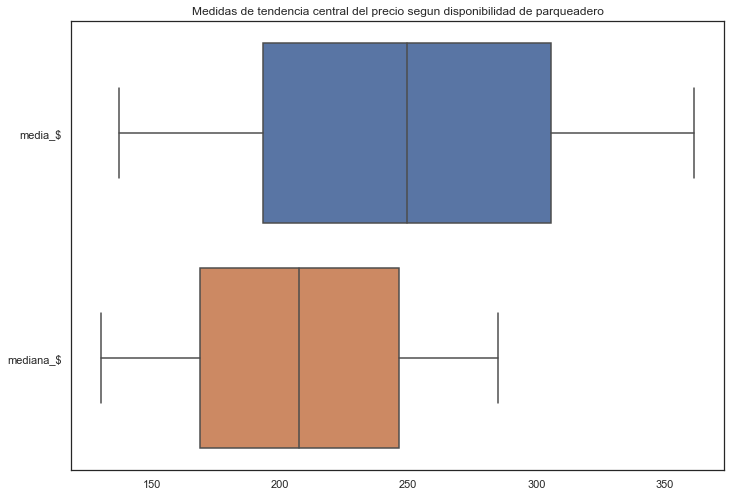

In [405]:
sb.boxplot(data=df_pp,orient='h').set_title("Medidas de tendencia central del precio segun disponibilidad de parqueadero")

In [406]:
# yes_median = round(df[(df['parqueadero'] == 'si')]['precio'].median(),2)
# yes_mean = round(df[(df['parqueadero'] == 'si')]['precio'].mean(),2)
# yes_mode = round(df[(df['parqueadero'] == 'si')]['precio'].mode(),2)
# no_median = round(df[(df['parqueadero'] == 'no')]['precio'].median(),2)
# no_mean = round(df[(df['parqueadero'] == 'no')]['precio'].mean(),2)
# no_mode = round(df[(df['parqueadero'] == 'no')]['precio'].mode(),2)
#
# df_yn = pd.DataFrame()
# df_yn['si'] = [yes_mean,yes_median,yes_mode]
# df_yn['no'] = [no_mean,no_median,no_mode]
# df_yn


## Mt2 regarding of terminado

In [407]:
var_mt2 = df['mt2']
mt = pd.DataFrame()
mt['media_$'] = var_mt2
mt['terminado'] = df['terminado']
df_mt = mt.groupby(['terminado']).mean()
mt_mediana = mt.groupby(['terminado']).median()
mt_mediana = mt_mediana['media_$'].values
df_mt['mediana_$'] = mt_mediana
mt_moda = mt.groupby(['terminado']).agg(pd.Series.mode)
df_mt['moda_$'] = mt_moda
mt_terminado = df_mt.index.values
df_mt['terminado'] = mt_terminado

Text(0.5, 1.0, 'Medidas de tendecia central de los mt2 segun estado de construccion')

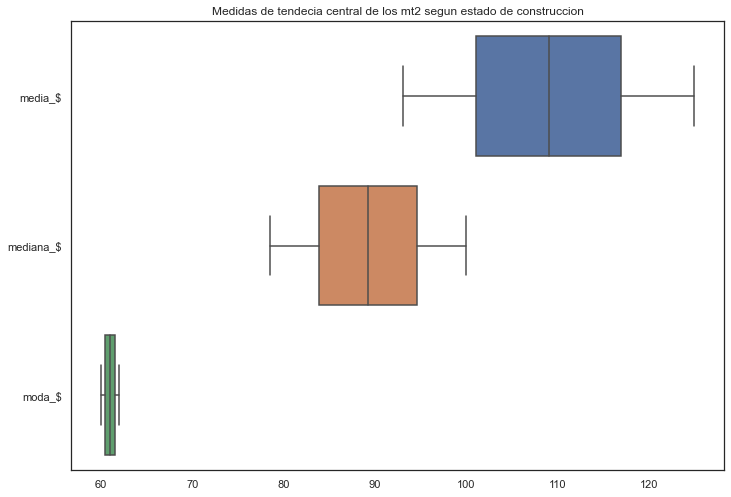

In [408]:
sb.boxplot(data=df_mt, orient='h').set_title("Medidas de tendecia central de los mt2 segun estado de construccion")

In [409]:
# sb.boxplot(x='parqueadero',y='precio',data=df)
# plt.axhline(yes_mean, color ="r", linestyle = '--', linewidth = 5)
# plt.axhline(yes_median, color ="g", linestyle = '--', linewidth = 5)
# plt.axhline(yes_mode.values, color ="y", linestyle = 'dashdot', linewidth = 5)